In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
ticker = 'STLAM.MI'
stock = yf.Ticker(ticker)
hist_data = stock.history(period='10y')

In [3]:
hist_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-05-05 00:00:00+02:00,3.150615,3.179487,3.080240,3.092871,26752805,0.0,0.0
2014-05-06 00:00:00+02:00,3.132570,3.168659,3.020692,3.056782,39819045,0.0,0.0
2014-05-07 00:00:00+02:00,2.851071,2.874529,2.679646,2.699495,136349603,0.0,0.0
2014-05-08 00:00:00+02:00,2.728367,2.789719,2.677842,2.685060,48630316,0.0,0.0
2014-05-09 00:00:00+02:00,2.697691,2.755434,2.614685,2.717540,48297790,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-26 00:00:00+02:00,23.190001,23.330000,23.045000,23.045000,11608213,0.0,0.0
2024-04-29 00:00:00+02:00,23.285000,23.325001,22.924999,23.225000,7255340,0.0,0.0
2024-04-30 00:00:00+02:00,22.889999,23.025000,20.840000,20.879999,28459495,0.0,0.0


In [4]:
STLN=pd.DataFrame(hist_data['Close'])
STLN

,Close
Date,
2014-05-05 00:00:00+02:00,3.092871
2014-05-06 00:00:00+02:00,3.056782
2014-05-07 00:00:00+02:00,2.699495
2014-05-08 00:00:00+02:00,2.685060
2014-05-09 00:00:00+02:00,2.717540
...,...
2024-04-26 00:00:00+02:00,23.045000
2024-04-29 00:00:00+02:00,23.225000
2024-04-30 00:00:00+02:00,20.879999


In [5]:
STLN.rename(columns={'Close':'Price'}, inplace=True)
STLN

,Price
Date,
2014-05-05 00:00:00+02:00,3.092871
2014-05-06 00:00:00+02:00,3.056782
2014-05-07 00:00:00+02:00,2.699495
2014-05-08 00:00:00+02:00,2.685060
2014-05-09 00:00:00+02:00,2.717540
...,...
2024-04-26 00:00:00+02:00,23.045000
2024-04-29 00:00:00+02:00,23.225000
2024-04-30 00:00:00+02:00,20.879999


In [6]:
#The calculation of SMAs is made simple by the rolling() method

In [7]:
#Creates a column with 30 days of SMA values. The first 29 values will be NaN.

In [8]:
STLN['SMA1'] = STLN['Price'].rolling(30).mean()

In [9]:
#Creates a column with 200 days of SMA values. The first 199 values will be NaN.

In [10]:
STLN['SMA2'] = STLN['Price'].rolling(200).mean()

In [11]:
STLN

,Price,SMA1,SMA2
Date,,,
2014-05-05 00:00:00+02:00,3.092871,NaN,NaN
2014-05-06 00:00:00+02:00,3.056782,NaN,NaN
2014-05-07 00:00:00+02:00,2.699495,NaN,NaN
2014-05-08 00:00:00+02:00,2.685060,NaN,NaN
2014-05-09 00:00:00+02:00,2.717540,NaN,NaN
...,...,...,...
2024-04-26 00:00:00+02:00,23.045000,23.775897,19.066784
2024-04-29 00:00:00+02:00,23.225000,23.758494,19.104723
2024-04-30 00:00:00+02:00,20.879999,23.642332,19.131413


In [12]:
%matplotlib inline
from pylab import mpl, plt

In [13]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 30
mpl.rcParams['font.family'] = 'serif'

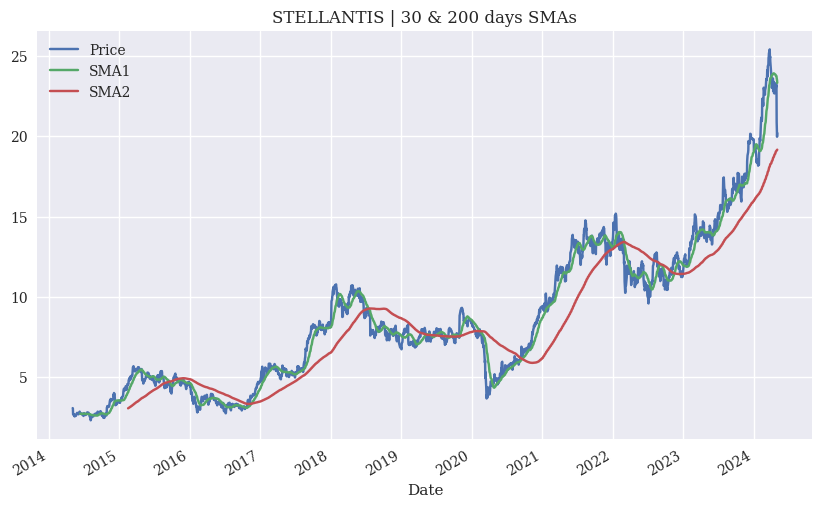

In [14]:
plot=STLN.plot(title='STELLANTIS | 30 & 200 days SMAs',figsize=(10, 6));

In [15]:
#The rule is to go long whenever the shorter SMA is above the longer one and vice versa. 
#we indicate a long position by 1 and a short position by –1.

In [16]:
STLN['position']=np.where(STLN['SMA1'] > STLN['SMA2'],1, -1)
STLN.dropna(inplace=True)

<AxesSubplot:title={'center':'Market Positioning'}, xlabel='Date'>

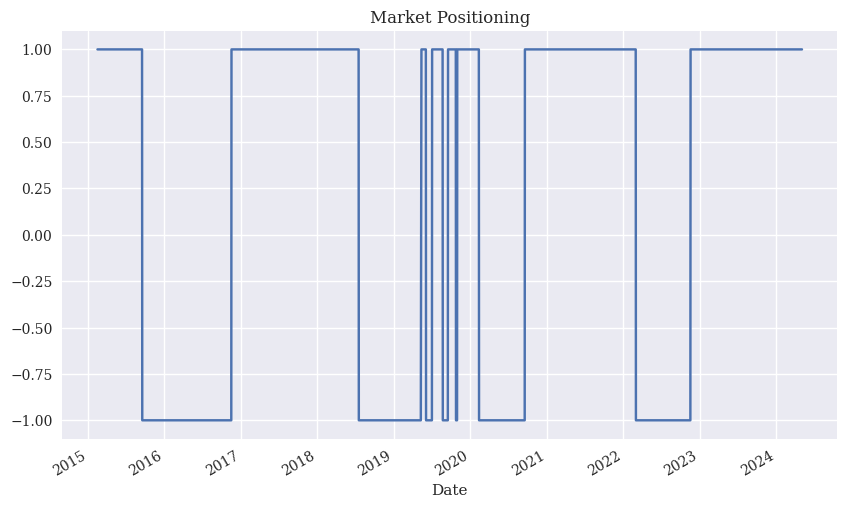

In [17]:
STLN['position'].plot(ylim=[-1.1, 1.1],title='Market Positioning',
figsize=(10, 6))

In [18]:
#valuating position and strategy returns

In [19]:
STLN['returns'] = np.log(STLN['Price'] / STLN['Price'].shift(1))

In [20]:
STLN['strategy'] = STLN['position'].shift(1) * STLN['returns']

In [21]:
STLN[['returns', 'strategy']].sum()

returns     1.483991
strategy    2.026036
dtype: float64

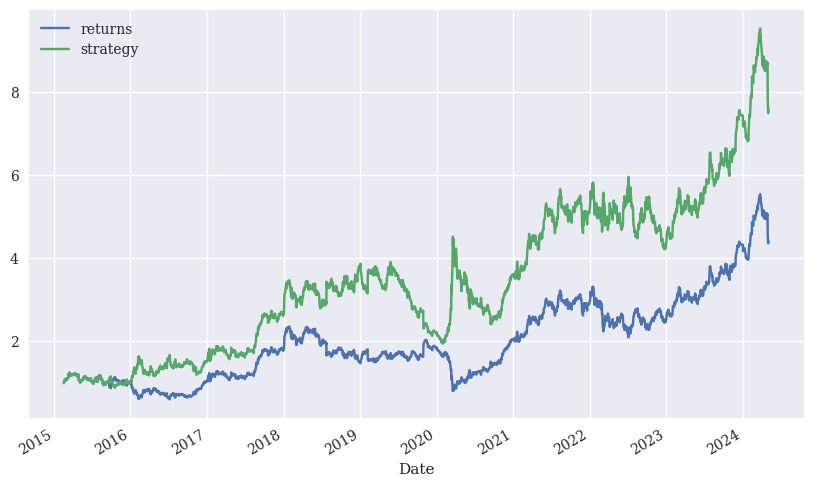

In [22]:
STLN[['returns', 'strategy']].dropna().cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6));

In [23]:
#Gross performance of Stellantis compared to the SMA-based strategy

In [24]:
#annualized mean log-return 

In [25]:
mean_logrets=np.exp(STLN[['returns', 'strategy']].mean() * 252) - 1
mean_logrets

returns     0.172973
strategy    0.243358
dtype: float64

In [26]:
#standard deviation

In [27]:
std_logrets=(STLN[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5
std_logrets

returns     0.382169
strategy    0.387433
dtype: float64

In [28]:
#new column defining the gross performance over time.

In [29]:
STLN['cumret'] = STLN['strategy'].cumsum().apply(np.exp)

In [30]:
STLN

,Price,SMA1,SMA2,position,returns,strategy,cumret
Date,,,,,,,
2015-02-16 00:00:00+01:00,4.583368,4.068731,3.078706,1,NaN,NaN,NaN
2015-02-17 00:00:00+01:00,4.561714,4.105122,3.086050,1,-0.004736,-0.004736,0.995276
2015-02-18 00:00:00+01:00,4.637502,4.143016,3.093954,1,0.016477,0.016477,1.011811
2015-02-19 00:00:00+01:00,4.817950,4.183737,3.104546,1,0.038173,0.038173,1.051181
2015-02-20 00:00:00+01:00,4.850430,4.226082,3.115373,1,0.006719,0.006719,1.058268
...,...,...,...,...,...,...,...
2024-04-26 00:00:00+02:00,23.045000,23.775897,19.066784,1,0.006749,0.006749,8.645677
2024-04-29 00:00:00+02:00,23.225000,23.758494,19.104723,1,0.007780,0.007780,8.713207
2024-04-30 00:00:00+02:00,20.879999,23.642332,19.131413,1,-0.106438,-0.106438,7.833445


In [31]:
#maximum value of the grossperformance.

In [32]:
STLN['cummax'] = STLN['cumret'].cummax()

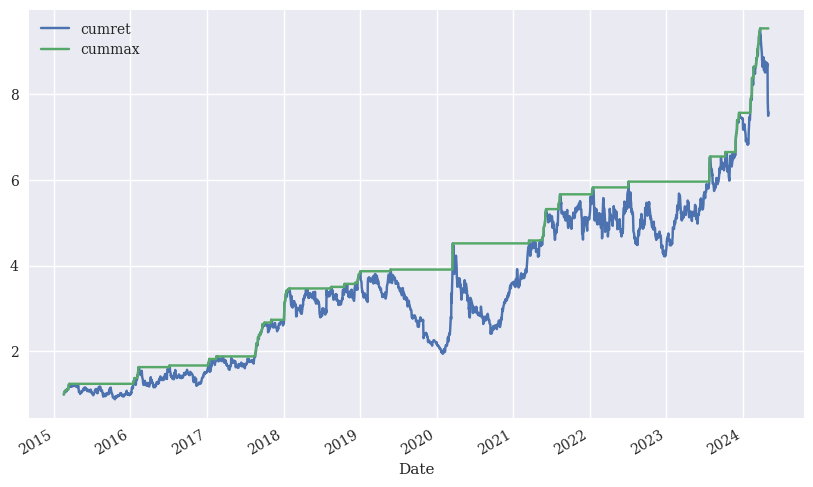

In [33]:
STLN[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [34]:
# Gross performance and cumulative maximum performance of the SMA- based strategy

In [35]:
drawdown = STLN['cummax'] - STLN['cumret']
drawdown.max()

2.1086855474981627